<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/GROUP_5%2CASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import tree

In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/loan_eligibility_dataset_large.csv')
data

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5 years,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4 years,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1 years,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10 years,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1 years,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LN099996,CU099996,0,21323,Short Term,337,8 years,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0
99996,LN099997,CU099997,0,19158,Long Term,702,6 years,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0
99997,LN099998,CU099998,1,38713,Short Term,567,< 1 year,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0
99998,LN099999,CU099999,1,18105,Short Term,500,8 years,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0


In [ ]:
data.shape

(100000, 19)

In [ ]:
data.dtypes

,0
Loan_ID,object
Customer_ID,object
Loan_Status,int64
Current_Loan_Amount,int64
Term,object
Credit_Score,int64
Years_in_current_job,object
Home_Ownership,object
Annual_Income,int64
Purpose,object


In [ ]:
#######changing  years in current job from object to float
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace(' years', '', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('< 1 year', '0.5', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('10+', '10', regex=False)

data['Years_in_current_job'] = data['Years_in_current_job'].astype(float)

data.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0


In [ ]:
##flagging missing values in tax liens and bankruptcienes and creating new inducator columns
data['tax_liens_missing'] = data['Tax_Liens'].isna().astype(int)
data['bankruptcy_missing'] = data['Bankruptcies'].isna().astype(int)



In [ ]:
##filling in the missing vallues
data['Tax_Liens'].fillna(0, inplace=True)
data['Bankruptcies'].fillna(0, inplace=True)

/tmp/ipython-input-967765764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tax_Liens'].fillna(0, inplace=True)
/tmp/ipython-input-967765764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
data

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,...,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,tax_liens_missing,bankruptcy_missing
0,LN000001,CU000001,1,6063,Short Term,369,5.0,Rent,97933,Buy a Car,...,7.7,110.0,4,1,47753,29959,0.0,0.0,0,0
1,LN000002,CU000002,0,41253,Short Term,440,4.0,Rent,32212,Home Improvements,...,3.1,31.0,9,0,2076,43274,0.0,0.0,0,0
2,LN000003,CU000003,0,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,...,23.7,21.0,5,3,45127,110076,0.0,0.0,0,0
3,LN000004,CU000004,1,37536,Short Term,561,10.0,Rent,112480,Home Improvements,...,1.1,115.0,7,3,82999,26555,0.0,0.0,0,0
4,LN000005,CU000005,1,5880,Long Term,778,1.0,Rent,60019,Business Loan,...,26.5,34.0,8,4,12993,96701,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LN099996,CU099996,0,21323,Short Term,337,8.0,Rent,78955,Business Loan,...,29.4,NaN,24,1,36182,132264,0.0,1.0,0,0
99996,LN099997,CU099997,0,19158,Long Term,702,6.0,Rent,77116,Home Improvements,...,27.1,62.0,13,3,26348,43536,0.0,0.0,0,0
99997,LN099998,CU099998,1,38713,Short Term,567,0.5,Home Mortgage,69427,Home Improvements,...,2.0,6.0,13,0,60141,10546,0.0,0.0,0,0
99998,LN099999,CU099999,1,18105,Short Term,500,8.0,Own Home,98044,Debt Consolidation,...,1.2,45.0,1,4,92921,140283,1.0,0.0,0,0


In [ ]:
##data types
data.dtypes

,0
Loan_ID,object
Customer_ID,object
Loan_Status,int64
Current_Loan_Amount,int64
Term,object
Credit_Score,int64
Years_in_current_job,float64
Home_Ownership,object
Annual_Income,int64
Purpose,object


In [ ]:
##class imbalance
data['Loan_Status'].value_counts()

,count
Loan_Status,
1,70111
0,29889


**PREPROCESSING**

In [ ]:
####Targets and features
y=data['Loan_Status']
y
x=data.drop('Loan_Status',axis=1)
x=x.drop('Loan_ID',axis=1)
x=x.drop('Customer_ID',axis=1)
x

,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,tax_liens_missing,bankruptcy_missing
0,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0,0,0
1,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0,0,0
2,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0,0,0
3,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0,0,0
4,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,21323,Short Term,337,8.0,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0,0,0
99996,19158,Long Term,702,6.0,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0,0,0
99997,38713,Short Term,567,0.5,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0,0,0
99998,18105,Short Term,500,8.0,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0,0,0


In [ ]:
####Split and Train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 18)
(30000, 18)
(70000,)
(30000,)


In [ ]:
#Checkingfor missing values
x_train.isna().sum()

,0
Current_Loan_Amount,0
Term,0
Credit_Score,0
Years_in_current_job,5721
Home_Ownership,0
Annual_Income,0
Purpose,0
Monthly_Debt,0
Years_of_Credit_History,0
Months_since_last_delinquency,6980


In [ ]:
##Handling missing values using the simple imputer for data types,number excluding the tax liens,bankruotciences,tax liens missing,bankrutpcy missing

num_cols=x_train.select_dtypes('number').columns
num_cols=num_cols.drop('Tax_Liens')
num_cols=num_cols.drop('Bankruptcies')
num_cols=num_cols.drop('tax_liens_missing')
num_cols=num_cols.drop('bankruptcy_missing')
num_cols


Index(['Current_Loan_Amount', 'Credit_Score', 'Years_in_current_job',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquency', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit'],
      dtype='object')

In [ ]:
##imputing for missing values using the simple imputer
impute_median = SimpleImputer(strategy='median')
impute_median.fit(x_train[num_cols])


SimpleImputer(strategy='median')

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
#Transform the training data
x_train_imputed= impute_median.transform(x_train[num_cols])
#Transform the testing data
x_test_imputed = impute_median.transform(x_test[num_cols])

In [ ]:
#TRANSFORMATION
impute_median.transform(x_train[num_cols])


,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
76513,4984.0,514.0,6.0,49679.0,1419.49,25.9,29.0,9.0,3.0,66746.0,98788.0
60406,49932.0,513.0,3.0,49912.0,1527.85,18.5,88.0,18.0,2.0,97161.0,30737.0
27322,27836.0,555.0,4.0,40806.0,735.44,17.2,92.0,11.0,1.0,72263.0,108036.0
53699,8387.0,494.0,5.0,98797.0,1867.64,13.3,83.0,16.0,3.0,42444.0,21878.0
65412,49604.0,765.0,5.0,78038.0,297.29,25.1,17.0,7.0,2.0,7131.0,130731.0
...,...,...,...,...,...,...,...,...,...,...,...
6265,29623.0,787.0,10.0,53517.0,1683.27,6.9,50.0,6.0,3.0,67435.0,35385.0
54886,44643.0,728.0,8.0,120831.0,1683.42,17.7,107.0,15.0,3.0,47853.0,112683.0
76820,21879.0,820.0,1.0,21128.0,1995.72,25.9,84.0,26.0,4.0,48674.0,53820.0
860,10568.0,796.0,9.0,121599.0,1605.84,18.4,89.0,20.0,4.0,86275.0,146375.0


In [ ]:
impute_median.transform(x_test[num_cols])

,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
75721,38882.0,667.0,8.0,80586.0,1254.59,30.0,47.0,15.0,3.0,41170.0,96501.0
80184,36051.0,600.0,2.0,114882.0,1132.78,10.8,117.0,20.0,4.0,39071.0,127276.0
19864,9990.0,460.0,5.0,89353.0,1970.74,27.0,28.0,12.0,3.0,69942.0,39838.0
76699,5745.0,443.0,7.0,63058.0,847.82,4.3,40.0,14.0,4.0,24592.0,83203.0
92991,5026.0,539.0,5.0,67463.0,1458.07,29.7,39.0,4.0,2.0,64307.0,49336.0
...,...,...,...,...,...,...,...,...,...,...,...
42648,12344.0,310.0,2.0,91282.0,345.01,15.4,84.0,15.0,0.0,9035.0,42135.0
86306,6516.0,750.0,0.5,44136.0,1654.72,23.6,60.0,6.0,0.0,83872.0,89062.0
45466,3323.0,785.0,7.0,27603.0,446.52,3.3,47.0,24.0,4.0,62287.0,141731.0
63724,35337.0,521.0,5.0,142046.0,1792.66,2.3,15.0,11.0,2.0,89918.0,8229.0


In [ ]:
#Checking for missing values in the training set
null_counter1 = x_train_imputed[num_cols].isna().sum()
null_counter1[null_counter1>0]
#checking for missing values in the test set- after transformation
null_counter2 = x_test_imputed[num_cols].isna().sum()
null_counter2[null_counter2>0]



,0


In [ ]:
#Checking for categoricaal values

# 1. selected columns of string data type
cat_cols= x_train.select_dtypes('object').columns
cat_cols

Index(['Term', 'Home_Ownership', 'Purpose'], dtype='object')

In [ ]:
##checking for missing values
x_train[cat_cols].isna().sum()

,0
Term,0
Home_Ownership,0
Purpose,0


In [ ]:
##One hot encoding
# saving list of categorical features to one-hot-encode
ohe_cols = cat_cols
ohe_cols

Index(['Term', 'Home_Ownership', 'Purpose'], dtype='object')

In [ ]:
# Instantiate one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(x_train[ohe_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
X_train_cat_ohe = ohe_encoder.transform(x_train[ohe_cols])
X_train_cat_ohe

,Term_Long Term,Term_Short Term,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills
76513,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60406,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27322,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
53699,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6265,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
54886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
76820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_cat_ohe = ohe_encoder.transform(x_test[ohe_cols])
X_test_cat_ohe

,Term_Long Term,Term_Short Term,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills
75721,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
80184,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19864,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76699,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42648,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
86306,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45466,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
63724,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate imputed numeric and one-hot encoded categorical features, and additional columns for the training data
x_processed = pd.concat([x_train_imputed, X_train_cat_ohe, x_train[['Tax_Liens', 'Bankruptcies', 'tax_liens_missing', 'bankruptcy_missing']]], axis=1)
y_processed = y_train

In [ ]:
# Concatenate imputed numerical and one-hot encoded categorical features, and additional columns for the test data
x_test_processed = pd.concat([x_test_imputed, X_test_cat_ohe, x_test[['Tax_Liens', 'Bankruptcies', 'tax_liens_missing', 'bankruptcy_missing']]], axis=1)

In [ ]:
len(x_processed)

70000

In [ ]:
len(y_processed)

70000

In [ ]:
len(x_test_processed)

30000

In [ ]:
len(y_test)

30000

**DATA MODELLING**

**MODELS CHOSEN FOR THE TRAINING**

**1.K nearest neighbours (KNN)**

**Rationale for choosing the model**

Its decisions are based solely on local neighborhoods, which can be useful if the decision boundary is highly irregular or localized.

**2. Logistic Regression.**

**Ratinale for choosing the model:**

Logistic Regression is a linear model that provides probabilities as output, which can be very useful for understanding the likelihood of a loan being "Charged Off." The coefficients can indicate the strength and direction of a feature's relationship with the outcome.

**3. Decision Tree Classifier**

**Rationale for selecting the model:**

It can capture complex, non-linear relationships between features and the target variable without requiring explicit feature transformations.

**4. Random tree clasifier**

**Rationale for selecting the model**

It can provide insights into which features are most important for predicting Loan_Status,it can effectively learn from imbalanced datasets, giving more importance to the minority class

In [ ]:
#1.USING THE K NEAREST NEIGHBOURS
### hyper parameter tunng and building and fiiting the pipeline,handling the data imbalance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Combine preprocessing and model in a pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(weights='distance')) # Using 'distance' weights to give more importance to closer neighbors
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='recall') # Scoring on recall to prioritize minority class

# Fit GridSearchCV to the training data
grid_search.fit(x_processed, y_processed)

# Get the best model from the grid search
best_knn = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'knn__n_neighbors': 9}


In [ ]:
#tessting the model_selection
# Concatenate imputed numerical and one-hot encoded categorical features for the test set
x_test_processed = pd.concat([x_test_imputed, X_test_cat_ohe, x_test[['Tax_Liens', 'Bankruptcies', 'tax_liens_missing', 'bankruptcy_missing']]], axis=1)

test_preds = best_knn.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.29      0.10      0.14      8984
           1       0.70      0.90      0.79     21016

    accuracy                           0.66     30000
   macro avg       0.49      0.50      0.46     30000
weighted avg       0.58      0.66      0.59     30000



**INTERPRETATION**

**Interpretation of Each Metric**

**For Class 0 ("Charged Off"):**

Precision (0.29):This means that when the  model predicts a loan will be "Charged Off" (class 0), it is correct only 29% of the time. This is very low. A large number of loans that your model flags as "Charged Off" are actually "Fully Paid" (these are False Positives). This could lead to a high number of incorrect rejections for loan applicants.

Recall (0.10):This means that  out of all the loans that actually ended up being "Charged Off" (class 0), the model correctly identified only 10% of them. This is extremely low. Your model is missing 90% of the truly "Charged Off" loans (False Negatives). In a loan eligibility context, this is a significant risk, as the model is failing to identify most of the high-risk loans.

F1-Score (0.14): An F1-score of 0.14 confirms that the model is performing very poorly on the "Charged Off" class.

Support (8984): There are 8984 actual "Charged Off" loans in your test dataset.

**For Class 1 ("Fully Paid"):**

Precision (0.70): This means that  when your model predicts a loan will be "Fully Paid" (class 1), it is correct 70% of the time.

Recall (0.90):This means that out of all the loans that actually ended up being "Fully Paid" (class 1), the  model correctly identified 90% of them.This implies that  the  model is doing quite well at identifying "Fully Paid" loans, as expected with an imbalanced dataset.

F1-Score (0.79): There is  balanced score for the majority class.

Support (21016):This means that there are 21016 actual "Fully Paid" loans in your test dataset.

**Overall Metrics:**

**Accuracy (0.66):** The Overall, 66% of all predictions made by the  model were correct. This is a misleading metric for the problem. The model is achieving this accuracy by doing a good job on the majority class and a terrible job on the minority class.

**Conclusion**:

This report indicates that the model is still heavily biased towards the majority class and is performing poorly on the minority "Charged Off" class. While it is attempting to predict the minority class (as seen by the non-zero Precision and Recall), it is still missing a vast majority of the actual risky loans.

The low recall of 0.10 for the "Charged Off" class is the most critical metric here, highlighting that the model is failing to identify most of the loan defaults.


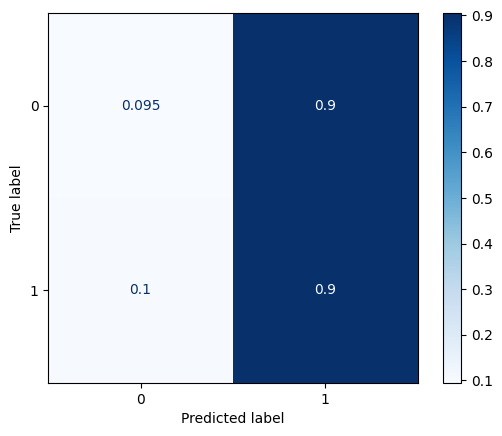

In [ ]:
##confusion matrix normalised
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

In [ ]:
###2.USING THE LOGISTIC REGRESSION and hyper paramater tuning and building pipeines and data imbalanace

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

##combine preprocessing and model in pipeline
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced')) # Added class_weight to handle imbalance
])
#Grid sarch in the pipeline
param_grid = {'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg_pipeline, param_grid, cv=5, scoring='recall') # Changed scoring to recall to prioritize minority class
grid_search.fit(x_processed, y_processed)
best_log_reg = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'log_reg__C': 0.001}


In [ ]:
## testing the model
test_preds = best_log_reg.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.30      0.51      0.38      8984
           1       0.70      0.49      0.58     21016

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.48     30000
weighted avg       0.58      0.50      0.52     30000



**INTERPRETATION OF THE CLASSIFICATION REPORT**

**Interpretation of Each Metric:**

**For Class 0 ("Charged Off"):**

**Precision (0.30):* **
This means that the  model predicts a loan will be "Charged Off" (class 0), it is correct 30% of the time.


**Recall (0.51):**
This means that out of all the loans that actually ended up being "Charged Off" (class 0), the model correctly identified 51% of them.

**F1-Score (0.38):**
 The F1-score has more than doubled, reflecting the significant increase in recall.

**For Class 1 ("Fully Paid"):**

**Precision (0.70):**
Comparison: There is  balanced score for the majority class..

**Recall (0.49):**
 Out of all the loans that actually ended up being "Fully Paid" (class 1), the model correctly identified only 49% of them.


**Conclusion :**
This report represents a huge success in the  data handling and model training,since its no longe learninf from only the full paid.








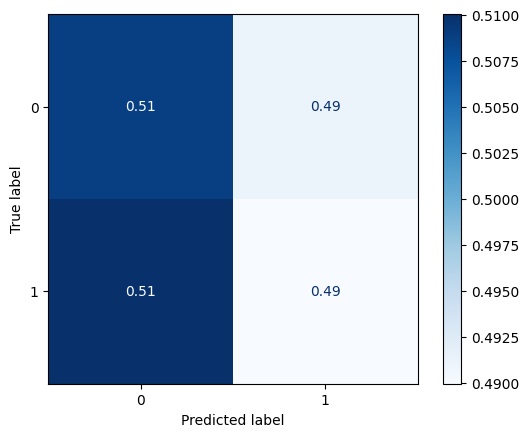

In [ ]:
##confusion matrix,normalised
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')


In [ ]:
## 3. DECISON TREE CLASSIFIER
# Hyperparameter tuning using Decision Tree Classifier,building the pipeling and handling the data imbalance

# Hyperparameter tuning using Decision Tree Classifier,building the pipeling and handling the data imbalance

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Combine preprocessing and model in a pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42)) # Added random_state for reproducibility
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__class_weight': [None, 'balanced'] # Added class_weight to address class imbalance
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='recall') # Changed scoring to recall to prioritize identifying Charged Off loans

# Fit GridSearchCV to the training data
grid_search.fit(x_processed, y_processed)

# Get the best model from the grid search
best_dt = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'dt__class_weight': None, 'dt__max_depth': 10, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}


In [ ]:
##testing the model
test_preds = best_dt.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.26      0.00      0.01      8984
           1       0.70      1.00      0.82     21016

    accuracy                           0.70     30000
   macro avg       0.48      0.50      0.41     30000
weighted avg       0.57      0.70      0.58     30000



**INTERPRETATION OF THE  CLASSFICATION REPORT**
**Interpretation of Key Metrics:**

**For Class 0 ("Charged Off")**

**Precision (0.26)**: Of all the loans the  model predicted would be "Charged Off," only 26% were actually correct. This indicates a high number of False Positives—loans the model incorrectly flagged as risky.

**Recall (0.00)**: Of all the loans that actually defaulted, the  model correctly identified 0% of them. This is a critical failure. It means the model is missing every single "Charged Off" loan and has a severe False Negative problem.

**F1-Score (0.01)**: . A score of 0.01 is extremely low, confirming that the model's performance on the minority class is essentially zero.

**Support (8984) :** This is the number of actual "Charged Off" loans in the test dataset.

**For Class 1 ("Fully Paid"):**

**Precision (0.70)**: Of all the loans the model predicted would be "Fully Paid," 70% were actually correct.

**Recall (1.00)**: Of all the loans that actually were "Fully Paid," the model correctly identified 100% of them. This perfect score is a strong signal that the model is simply predicting Class 1 for every single instance.

**F1-Score (0.82)**: A high F1-score confirms strong performance on the majority class.

**Final Conclusion**
This classification report is a clear signal that the model has failed to learn the minority class and has converged to the easiest solution: always predicting the majority class. The 0.00 recall for Class 0 is the most important metric, as it indicates a complete inability to identify any of the high-risk, defaulting loans.

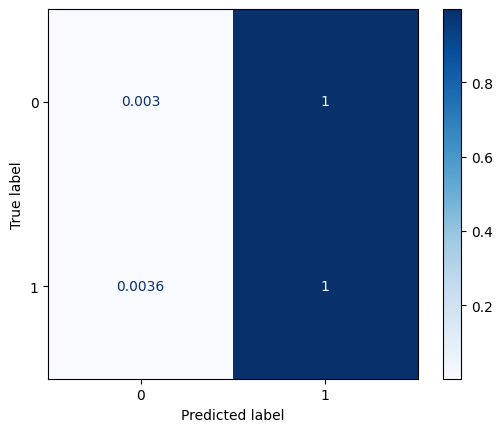

In [ ]:
##confusion matrix,normalised to percentages

confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

In [ ]:
##using the random tree clasifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_processed, y_processed)



RandomForestClassifier(random_state=42)

In [ ]:
##building and fiiting the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Combine preprocessing and model in a pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])






In [ ]:
##testing the model
test_preds = rf.predict(x_test_processed)
print(classification_report(y_test, test_preds))




              precision    recall  f1-score   support

           0       0.33      0.00      0.00      8984
           1       0.70      1.00      0.82     21016

    accuracy                           0.70     30000
   macro avg       0.51      0.50      0.41     30000
weighted avg       0.59      0.70      0.58     30000



**INTERPRETATION**

Precision (0.33): This indicates that when the model predicts a loan will be "Charged Off," it's correct about one-third of the time. However, this is a misleading metric in this report.

Recall (0.00): This is the most important metric here. It means that of all the loans that actually defaulted, the model correctly identified 0% of them. It has completely failed to find any of the high-risk loans in your test set.

F1-Score (0.00): Since the recall is 0.00, the F1-score is also effectively zero, confirming that the model has no predictive power for this class.

Support (8984): The number of actual "Charged Off" loans in the test set.

**For Class 1 ("Fully Paid"): **

Precision (0.70): When the model predicts "Fully Paid," it's correct 70% of the time.

Recall (1.00): This means that of all the loans that were actually "Fully Paid," the model correctly identified 100% of them. This perfect recall, combined with the 0.00 recall for Class 0, is a strong signal that the model is predicting Class 1 for virtually every single instance.



**Conclusion**
This report confirms that your model has not learned to distinguish between the two classes.

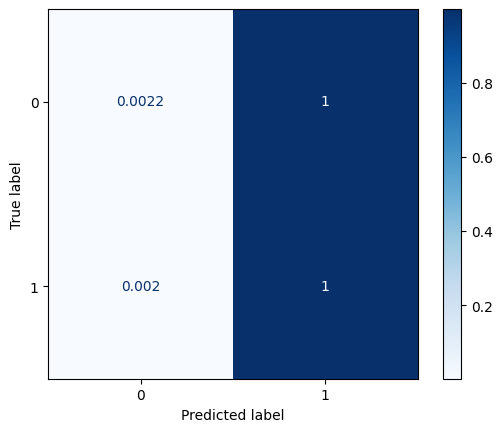

In [ ]:
##confusion matrix
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize="true")

**WRAP UP**
Based on the classification reports , the logistic regression performed best. While its overall accuracy is still low, it successfully moved beyond simply predicting the majority class, demonstrating an ability to identify and learn patterns for the "Charged Off" minority class.
**CHALLENGES**
Even after  applying hyper parameter tunining,the models are still not learning effectively

***NEXT STEP ***
To improve our model,we shall confirm  whether we correctly imputed for missing values and  aslo understand the accuracy of  our target before continuing with any other powerful algorithms



